In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.datasets
import scipy.io

import opt_utils
import testCase
%matplotlib inline #如果你用的是Jupyter Notebook请取消注释
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

UsageError: unrecognized arguments: #如果你用的是Jupyter Notebook请取消注释


In [2]:
def update_parameters_with_gd(parameters,grads,learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate*grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*grads['db'+str(l+1)]
        
    return parameters

In [3]:
# 测试 update_parameters_with_gd
parameters,grads,learning_rate = testCase.update_parameters_with_gd_test_case()
parameters = update_parameters_with_gd(parameters,grads,learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.3190391  -0.24937038  1.46210794]
 [-2.06014071 -0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127 -0.17242821]]
b2 = [[-0.87785842]
 [ 0.04221375]
 [ 0.58281521]]


In [4]:
def random_mini_batches(X,Y,mini_batch_size=64,seed = 0):
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((1,m))
    num_compute_minibatches = math.floor(m/mini_batch_size)
    for k in range(0,num_compute_minibatches):
        mini_batch_X = shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
        
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,mini_batch_size*num_compute_minibatches:]
        mini_batch_Y = shuffled_Y[:,mini_batch_size*num_compute_minibatches:]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
# 测试random_mini_batches
X_assess,Y_assess,mini_batch_size = testCase.random_mini_batches_test_case()

mini_batches = random_mini_batches(X_assess,Y_assess,mini_batch_size)
print("第1个mini_batch_X 的维度为：",mini_batches[0][0].shape)
print("第1个mini_batch_Y 的维度为：",mini_batches[0][1].shape)
print("第2个mini_batch_X 的维度为：",mini_batches[1][0].shape)
print("第2个mini_batch_Y 的维度为：",mini_batches[1][1].shape)
print("第3个mini_batch_X 的维度为：",mini_batches[2][0].shape)
print("第3个mini_batch_Y 的维度为：",mini_batches[2][1].shape)

第1个mini_batch_X 的维度为： (12288, 64)
第1个mini_batch_Y 的维度为： (1, 64)
第2个mini_batch_X 的维度为： (12288, 64)
第2个mini_batch_Y 的维度为： (1, 64)
第3个mini_batch_X 的维度为： (12288, 20)
第3个mini_batch_Y 的维度为： (1, 20)


In [9]:
# 初始化梯度
def initialize_velocity(parameters):
    L = len(parameters) // 2
    v = {}
    
    for l in range(L):
        v['dW'+str(l+1)] = np.zeros_like(parameters['W'+str(l+1)])
        v['db'+str(l+1)] = np.zeros_like(parameters['b'+str(l+1)])
    
    return v

In [10]:
# 测试initialize_velocity
parameters = testCase.initialize_velocity_test_case()
v = initialize_velocity(parameters)

print('v["dW1"]='+str(v['dW1']))
print('v["db1"]='+str(v['db1']))
print('v["dW2"]='+str(v['dW2']))
print('v["db2"]='+str(v['db2']))

v["dW1"]=[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"]=[[0.]
 [0.]]
v["dW2"]=[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"]=[[0.]
 [0.]
 [0.]]


In [15]:
def update_parameters_with_momentum(parameters,grads,v,beta,learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        v['dW'+str(l+1)] = beta*v['dW'+str(l+1)]+(1-beta)*grads['dW'+str(l+1)]
        v['db'+str(l+1)] = beta*v['db'+str(l+1)]+(1-beta)*grads['db'+str(l+1)]
        
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)]-learning_rate*v['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)]-learning_rate*v['db'+str(l+1)] 
    return parameters,v

In [16]:
# 测试update_parameters_with_momentum
parameters,grads,v = testCase.update_parameters_with_momentum_test_case()
parameters,v = update_parameters_with_momentum(parameters,grads,v,beta=0.9,learning_rate=0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print('v["dW1"] = ' + str(v["dW1"]))
print('v["db1"] = ' + str(v["db1"]))
print('v["dW2"] = ' + str(v["dW2"]))
print('v["db2"] = ' + str(v["db2"]))

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


In [17]:
def initialize_adam(parameters):
    L = len(parameters) //2
    v = {}
    s = {}
    
    for l in range(L):
        v['dW'+str(l+1)] = np.zeros_like(parameters['W'+str(l+1)])
        v['db'+str(l+1)] = np.zeros_like(parameters['b'+str(l+1)])  
        
        s['dW'+str(l+1)] = np.zeros_like(parameters['W'+str(l+1)])
        s['db'+str(l+1)] = np.zeros_like(parameters['b'+str(l+1)])
    return (v,s)

In [18]:
# 测试initialize_adam
parameters = testCase.initialize_adam_test_case()
v,s =initialize_adam(parameters)

print('v["dW1"] = ' + str(v["dW1"])) 
print('v["db1"] = ' + str(v["db1"])) 
print('v["dW2"] = ' + str(v["dW2"])) 
print('v["db2"] = ' + str(v["db2"])) 
print('s["dW1"] = ' + str(s["dW1"])) 
print('s["db1"] = ' + str(s["db1"])) 
print('s["dW2"] = ' + str(s["dW2"])) 
print('s["db2"] = ' + str(s["db2"])) 

v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


In [48]:
def update_parameters_with_adam(parameters,grads,v,s,t,learning_rate=0.01,beta1=0.9,beta2=0.999,epsilon=1e-8):

    L = len(parameters) // 2
    v_corrected = {} #偏差修正后的值
    s_corrected = {} #偏差修正后的值

    for l in range(L):
        #梯度的移动平均值,输入："v , grads , beta1",输出：" v "
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads["dW" + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads["db" + str(l + 1)]

        #计算第一阶段的偏差修正后的估计值，输入"v , beta1 , t" , 输出："v_corrected"
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1,t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1,t))

        #计算平方梯度的移动平均值，输入："s, grads , beta2"，输出："s"
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.square(grads["dW" + str(l + 1)])
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.square(grads["db" + str(l + 1)])

        #计算第二阶段的偏差修正后的估计值，输入："s , beta2 , t"，输出："s_corrected"
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2,t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2,t))

        #更新参数，输入: "parameters, learning_rate, v_corrected, s_corrected, epsilon". 输出: "parameters".
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * (v_corrected["dW" + str(l + 1)] / np.sqrt(s_corrected["dW" + str(l + 1)] + epsilon))
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * (v_corrected["db" + str(l + 1)] / np.sqrt(s_corrected["db" + str(l + 1)] + epsilon))

    return (parameters,v,s)

In [49]:
#测试 update_parameters_with_adam
parameters,grads,v,s = testCase.update_parameters_with_adam_test_case()
update_parameters_with_adam(parameters,grads,v,s,t=2)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print('v["dW1"] = ' + str(v["dW1"])) 
print('v["db1"] = ' + str(v["db1"])) 
print('v["dW2"] = ' + str(v["dW2"])) 
print('v["db2"] = ' + str(v["db2"])) 
print('s["dW1"] = ' + str(s["dW1"])) 
print('s["db1"] = ' + str(s["db1"])) 
print('s["dW2"] = ' + str(s["dW2"])) 
print('s["db2"] = ' + str(s["db2"])) 

W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


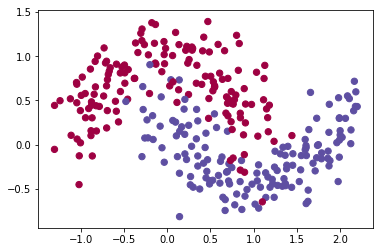

In [50]:
train_X,train_Y = opt_utils.load_dataset(is_plot=True)

In [64]:
def model(X,Y,layers_dims,optimizer,learning_rate = 0.0007,mini_batch_size = 64,beta = 0.9,beta1 = 0.9, beta2 = 0.999,
         epsilon = 1e-8,num_epochs = 10000,print_cost = True,is_plot = True):
    """
    可以运行在不同优化器模式下的3层神经网络模型。

    参数：
        X - 输入数据，维度为（2，输入的数据集里面样本数量）
        Y - 与X对应的标签
        layers_dims - 包含层数和节点数量的列表
        optimizer - 字符串类型的参数，用于选择优化类型，【 "gd" | "momentum" | "adam" 】
        learning_rate - 学习率
        mini_batch_size - 每个小批量数据集的大小
        beta - 用于动量优化的一个超参数
        beta1 - 用于计算梯度后的指数衰减的估计的超参数
        beta2 - 用于计算平方梯度后的指数衰减的估计的超参数
        epsilon - 用于在Adam中避免除零操作的超参数，一般不更改
        num_epochs - 整个训练集的遍历次数，（视频2.9学习率衰减，1分55秒处，视频中称作“代”）,相当于之前的num_iteration
        print_cost - 是否打印误差值，每遍历1000次数据集打印一次，但是每100次记录一个误差值，又称每1000代打印一次
        is_plot - 是否绘制出曲线图

    返回：
        parameters - 包含了学习后的参数

    """
    L = len(layers_dims)
    costs = []
    t = 0
    seed = 10
    
    parameters = opt_utils.initialize_parameters(layers_dims)
    if optimizer == 'gd':
        pass
    elif optimizer == 'momentum':
        v = initialize_velocity(parameters)
    elif optimizer == 'adam':
        v,s = initialize_adam(parameters)
    else:
        print('error')
        exit(1)
        
    for i in range(num_epochs):
         #定义随机 minibatches,我们在每次遍历数据集之后增加种子以重新排列数据集，使每次数据的顺序都不同
        seed = seed + 1
        mini_batches = random_mini_batches(X,Y,mini_batch_size,seed)
        for mini_batch in mini_batches:
            (mini_batch_X,mini_batch_Y) = mini_batch
            A3,cache = opt_utils.forward_propagation(mini_batch_X,parameters)
            cost = opt_utils.compute_cost(A3,mini_batch_Y)
            grads = opt_utils.backward_propagation(mini_batch_X,mini_batch_Y,cache)
            
            if optimizer == 'gd':
                parameters = update_parameters_with_gd(parameters,grads,learning_rate)
            elif optimizer == 'momentum':
                parameters = update_parameters_with_momentum(parameters,grads,v,beta,learning_rate)
            elif optimizer == 'adam':
                t = t + 1
                parameters = update_parameters_with_adam(parameters,grads,v,s,t,learning_rate,beta1,beta2,epsilon)
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost and i % 1000 == 0:
                print("第" + str(i) + "次遍历整个数据集，当前误差值：" + str(cost))
    
    if is_plot:
        plt.plot(costs)
        plt.xlabel('epochs(each hundreds)')
        plt.ylabel('cost')
        plt.title('learning_rate = ' + str(learning_rate))
        plt.show()
    
    return parameters

第0次遍历整个数据集，当前误差值：0.6907315399148803
第1000次遍历整个数据集，当前误差值：0.686319492767445
第2000次遍历整个数据集，当前误差值：0.6575466501597375
第3000次遍历整个数据集，当前误差值：0.6226473966347861
第4000次遍历整个数据集，当前误差值：0.5943416830427097
第5000次遍历整个数据集，当前误差值：0.6335584941617652
第6000次遍历整个数据集，当前误差值：0.5664253343086854
第7000次遍历整个数据集，当前误差值：0.5995865939398316
第8000次遍历整个数据集，当前误差值：0.546620948894525
第9000次遍历整个数据集，当前误差值：0.5947143326142261


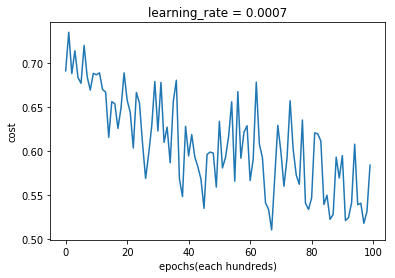

In [70]:
layers_dims = [train_X.shape[0],5,2,1]
parameters = model(train_X,train_Y,layers_dims,optimizer='gd',is_plot=True)

Accuracy: 0.5


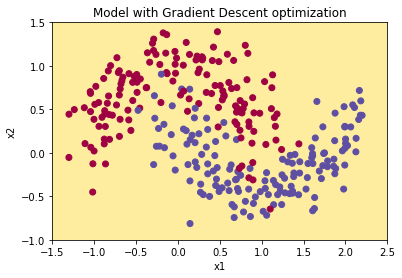

In [66]:
predictions = opt_utils.predict(train_X,train_Y,parameters) 

plt.title('Model with Gradient Descent optimization')
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x : opt_utils.predict_dec(parameters,x.T),train_X,np.squeeze(train_Y))

In [71]:
layers_dims = [train_X.shape[0],5,2,1]
parameters = model(train_X,train_Y,layers_dims,optimizer='momentum',is_plot=True)

TypeError: tuple indices must be integers or slices, not str

Accuracy: 0.5


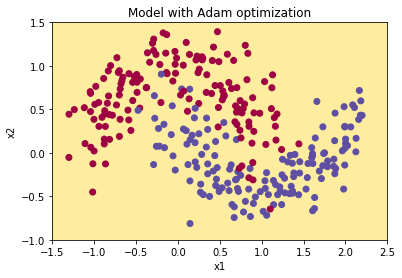

In [68]:
#预测
preditions = opt_utils.predict(train_X,train_Y,parameters)

#绘制分类图
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
opt_utils.plot_decision_boundary(lambda x: opt_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))